# Dependencies
1. Tensorflow version : 2.15.1
2. Pydot
3. Graphviz
4. Python : Python 3.10.x is needed
5. Hls4ml

## Commands to install above dependencies
1. pip install tensorflow==2.15.x
2. pip install pydot
3. pip install graphviz
4. sudo apt install python3
5. pip install hls4ml

In [ ]:
# removed pragmas from dense_latency.h
# removed pragmas from nnet_pooling.h
# removed pragmas from nnet_activation.h
# changed partition to block from complete in myproject.cpp
# keept block factor=4 for layer10_out

In [1]:
pip install pydot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import hls4ml

2024-04-23 18:23:13.060184: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 18:23:13.095482: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 18:23:13.096243: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-23 18:23:16.711349: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
from tensorflow.keras.models import load_model

In [5]:
model=load_model('model.h5')

In [6]:
print(len(model.layers))

7


In [7]:
config = hls4ml.utils.config_from_keras_model(model, granularity='name')


Interpreting Sequential
Topology:
Layer name: conv2d_1_input, layer type: InputLayer, input shapes: [[None, 90, 3, 1]], output shape: [None, 90, 3, 1]
Layer name: conv2d_1, layer type: Conv2D, input shapes: [[None, 90, 3, 1]], output shape: [None, 89, 2, 128]
Layer name: max_pooling2d_1, layer type: MaxPooling2D, input shapes: [[None, 89, 2, 128]], output shape: [None, 44, 1, 128]
Layer name: flatten_1, layer type: Reshape, input shapes: [[None, 44, 1, 128]], output shape: [None, 5632]
Layer name: dense_1, layer type: Dense, input shapes: [[None, 5632]], output shape: [None, 128]
Layer name: dense_2, layer type: Dense, input shapes: [[None, 128]], output shape: [None, 128]
Layer name: dense_3, layer type: Dense, input shapes: [[None, 128]], output shape: [None, 6]


In [8]:
print("-----------------------------------")
print("Configuration")
# plotting.print_dict(config)
print("-----------------------------------")
hls_model = hls4ml.converters.convert_from_keras_model(
    model, hls_config=config, output_dir='/home/abhinit_singh/my-hls-test5' , part='xc7a200tfbg676-2'
)

-----------------------------------
Configuration
-----------------------------------
Interpreting Sequential
Topology:
Layer name: conv2d_1_input, layer type: InputLayer, input shapes: [[None, 90, 3, 1]], output shape: [None, 90, 3, 1]
Layer name: conv2d_1, layer type: Conv2D, input shapes: [[None, 90, 3, 1]], output shape: [None, 89, 2, 128]
Layer name: max_pooling2d_1, layer type: MaxPooling2D, input shapes: [[None, 89, 2, 128]], output shape: [None, 44, 1, 128]
Layer name: flatten_1, layer type: Reshape, input shapes: [[None, 44, 1, 128]], output shape: [None, 5632]
Layer name: dense_1, layer type: Dense, input shapes: [[None, 5632]], output shape: [None, 128]
Layer name: dense_2, layer type: Dense, input shapes: [[None, 128]], output shape: [None, 128]
Layer name: dense_3, layer type: Dense, input shapes: [[None, 128]], output shape: [None, 6]
Creating HLS model


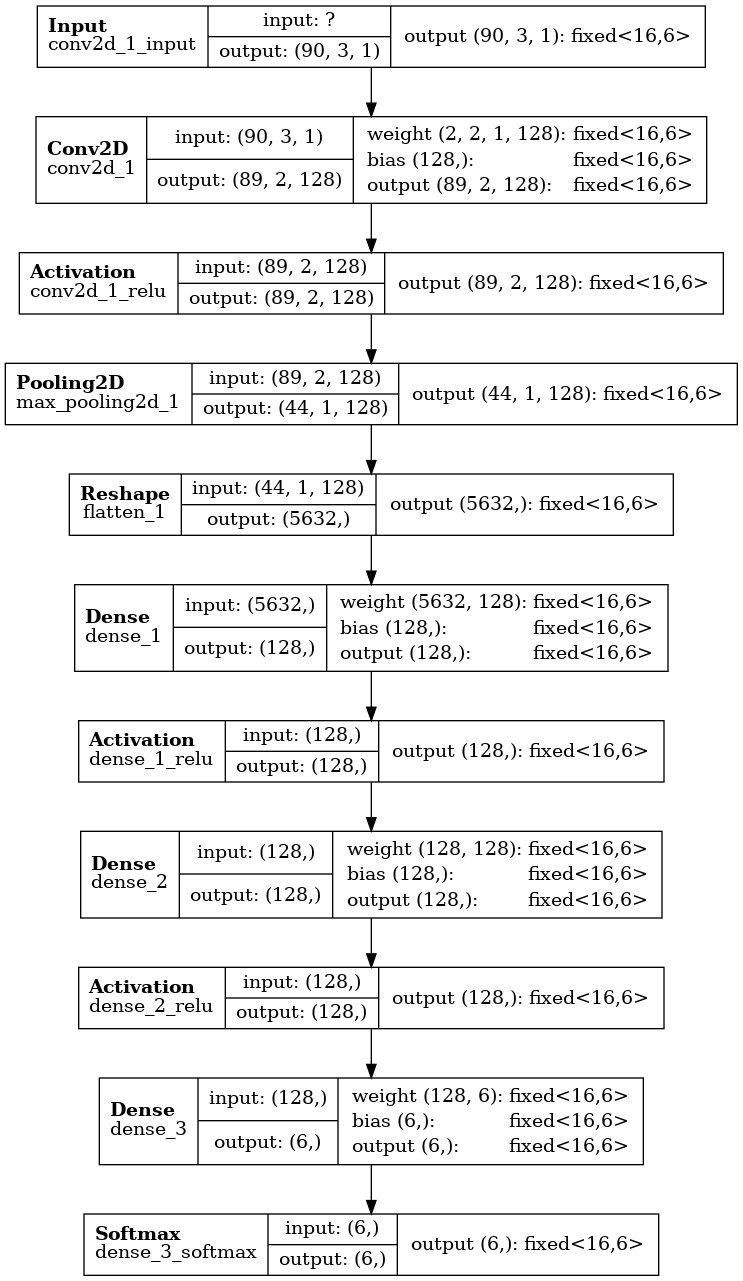

In [9]:
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=None)


In [10]:
hls_model.write()


Writing HLS project


/home/abhinit_singh/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Done


In [11]:
import os
os.environ['PATH']='/home/abhinit_singh/Vivado/2018.2/bin:'+os.environ['PATH']


In [12]:
hls_model.compile()

Writing HLS project
Done


In [16]:
# Use Vivado HLS to synthesize the model
# This might take several minutes
hls_model.build(csim=False)



****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2018.2 (64-bit)
  **** SW Build 2258646 on Thu Jun 14 20:02:38 MDT 2018
  **** IP Build 2256618 on Thu Jun 14 22:10:49 MDT 2018
    ** Copyright 1986-2018 Xilinx, Inc. All Rights Reserved.

source /home/abhinit_singh/Vivado/2018.2/scripts/vivado_hls/hls.tcl -notrace
INFO: [HLS 200-10] Running '/home/abhinit_singh/Vivado/2018.2/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'abhinit_singh' on host 'Abhinit123' (Linux_x86_64 version 6.5.0-26-generic) on Sun Apr 14 14:00:18 IST 2024
INFO: [HLS 200-10] On os Ubuntu 22.04.4 LTS
INFO: [HLS 200-10] In directory '/home/abhinit_singh/my-hls-test5'
INFO: [HLS 200-10] Opening project '/home/abhinit_singh/my-hls-test5/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp' to the project
INFO: [HLS 200-10] Adding test bench file 'myproject_test.cpp' to the project
INFO: [HLS 200-10] Adding test bench file 'firmware/weights' to the project
I

{'CSynthesisReport': {'TargetClockPeriod': '5.00',
  'EstimatedClockPeriod': '4.356',
  'BestLatency': '9273017',
  'WorstLatency': '9746106',
  'IntervalMin': '8685445',
  'IntervalMax': '8685445',
  'BRAM_18K': '1955',
  'DSP': '400',
  'FF': '151624',
  'LUT': '108606',
  'AvailableBRAM_18K': '730',
  'AvailableDSP': '740',
  'AvailableFF': '269200',
  'AvailableLUT': '129000'}}

In [17]:
# Print out the report if you want
hls4ml.report.read_vivado_report('/home/abhinit_singh/my-hls-test5')

Found 1 solution(s) in /home/abhinit_singh/my-hls-test5/myproject_prj.
Reports for solution "solution1":

C simulation report not found.
SYNTHESIS REPORT:
== Vivado HLS Report for 'myproject'
* Date:           Sun Apr 14 17:00:41 2024

* Version:        2018.2 (Build 2258646 on Thu Jun 14 20:25:20 MDT 2018)
* Project:        myproject_prj
* Solution:       solution1
* Product family: artix7
* Target device:  xc7a200tfbg676-2


== Performance Estimates
+ Timing (ns): 
    * Summary: 
    +--------+-------+----------+------------+
    |  Clock | Target| Estimated| Uncertainty|
    +--------+-------+----------+------------+
    |ap_clk  |   5.00|     4.356|        0.62|
    +--------+-------+----------+------------+

+ Latency (clock cycles): 
    * Summary: 
    +---------+---------+---------+---------+----------+
    |      Latency      |      Interval     | Pipeline |
    |   min   |   max   |   min   |   max   |   Type   |
    +---------+---------+---------+---------+----------+
    |